In [1]:
from qiskit import QuantumCircuit
from qiskit import execute, transpile, assemble, BasicAer, Aer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
l_player_1 = [0, 7, 8] #list of qbits cell numbers inicialized to 0('O')
l_player_2 = [3, 6] #list of qbits cell numbers inicialized to 1('X')
l_entangled = [(1,4),(4,5),(2,1)]

In [3]:
#translate from lists to initial state matrix
l_initial_ordered = [0,0,0,0,0,0,0,0,0]
for inx in range(len(l_player_1)):
    l_initial_ordered[l_player_1[inx]]=0
for inx in range(len(l_player_2)):
    l_initial_ordered[l_player_2[inx]]=1
entg_num = 1  
for inx in range(len(l_entangled)):
    l_initial_ordered[l_entangled[inx][0]]='e'+str(entg_num )   
    l_initial_ordered[l_entangled[inx][1]]='e'+str(entg_num  )
    entg_num +=1

print('This the initial table state inputed by the user:\n0 corresponds to player 1, 1 corresponds to player 2,\n e1,e2,e3... corresponds to entangled tiles')
print('-----\n'+str(l_initial_ordered[6])+'|'+str(l_initial_ordered[7])+'|'+str(l_initial_ordered[8]))
print('-----\n'+str(l_initial_ordered[3])+'|'+str(l_initial_ordered[4])+'|'+str(l_initial_ordered[5]))
print('-----\n'+str(l_initial_ordered[0])+'|'+str(l_initial_ordered[1])+'|'+str(l_initial_ordered[2]))
print('-----')

This the initial table state inputed by the user:
0 corresponds to player 1, 1 corresponds to player 2,
 e1,e2,e3... corresponds to entangled tiles
-----
1|0|0
-----
1|e2|e2
-----
0|e3|e3
-----


[0, 0, 0, 1, 0, 1, 1, 0, 0]


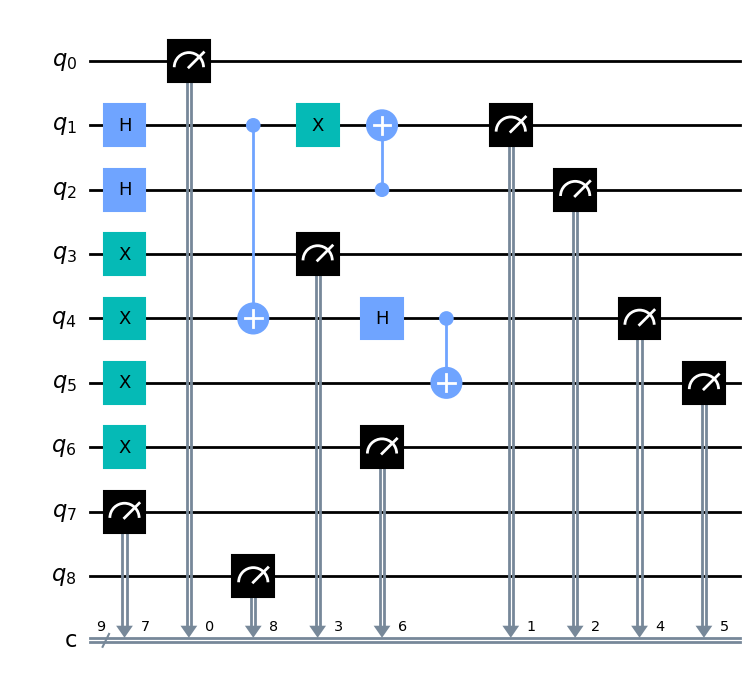

In [4]:
num_qubits = 9
circuit = QuantumCircuit(num_qubits, num_qubits)
circuit.name = "Tic toc toe"

for inx  in range(len(l_player_2)):
    circuit.x(l_player_2[inx])

for inx in range(len(l_entangled)):
    circuit.h(l_entangled[inx][0]) #hardamard gate
    circuit.x(l_entangled[inx][1]) #x gate
    circuit.cx(l_entangled[inx][0],l_entangled[inx][1]) #controlled-x gate
    
circuit.measure(list(range(9)), list(range(9)))
# Simulator
job = execute(circuit, BasicAer.get_backend('qasm_simulator'), shots=1)
result = job.result()
l_final_ordered=list(map(lambda x: int(x),list(list(result.get_counts().keys())[0][::-1])))
print(l_final_ordered)

#draw circuit
circuit.draw(output='mpl', filename='circuit.png')